<a href="https://colab.research.google.com/github/KaylumCassidy/CA/blob/main/c20323831_Mobile_Game_A_B_Testing_(MRKT_4109).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Game A/B Testing (MRKT 4109)

## Setting up data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/BMCA3/main/candy_crush.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(github_url)

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

   user_id  gate  gamerounds_sum  retention_day  retention_week
0      116    30               3          False           False
1      337    30              38           True           False
2      377    50             165           True           False
3      483    50               1          False           False
4      488    50             179           True            True


In [ ]:

# Check the available columns in the DataFrame
print("Available Columns:")
print(data.columns)

Available Columns:
Index(['user_id', 'gate', 'gamerounds_sum', 'retention_day', 'retention_week'], dtype='object')


In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

## EDA

### Statistics

In [ ]:
columns_of_interest = ['user_id', 'gate', 'gamerounds_sum', 'retention_day', 'retention_week']

# Create a subset of the dataframe with selected columns
subset_df = data[columns_of_interest]

# Display summary statistics
summary_stats = subset_df.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
             user_id          gate  gamerounds_sum
count  9.018900e+04  90189.000000    90189.000000
mean   4.998412e+06     40.087483       51.872457
std    2.883286e+06      9.999673      195.050858
min    1.160000e+02     30.000000        0.000000
25%    2.512230e+06     30.000000        5.000000
50%    4.995815e+06     50.000000       16.000000
75%    7.496452e+06     50.000000       51.000000
max    9.999861e+06     50.000000    49854.000000


In [ ]:
# Convert boolean retention columns to integers for correlation analysis
data['retention_day_int'] = data['retention_day'].astype(int)
data['retention_week_int'] = data['retention_week'].astype(int)

# Calculate correlation matrix
correlation_matrix = data[['gamerounds_sum', 'retention_day_int', 'retention_week_int']].corr()

correlation_matrix


,gamerounds_sum,retention_day_int,retention_week_int
gamerounds_sum,1.000000,0.197603,0.279288
retention_day_int,0.197603,1.000000,0.327401
retention_week_int,0.279288,0.327401,1.000000


Game Rounds vs. One-Day Retention: There is a positive correlation of 0.198 between the number of game rounds played and one-day retention. This indicates a modest relationship, suggesting that as the number of game rounds played increases, so does the likelihood of players returning one day after installing the game.

Game Rounds vs. One-Week Retention: The correlation between the number of game rounds played and one-week retention is 0.279, which is stronger than the correlation with one-day retention. This further supports the notion that higher engagement (in terms of game rounds played) increases the likelihood of players returning a week after installing the game.

One-Day vs. One-Week Retention: There's a correlation of 0.327 between one-day and one-week retention, indicating that players who return after one day are more likely to also return after a wee

user_id: A unique identifier for each player.
gate: Indicates the level at which the gate is placed (either level 30 or level 50).
gamerounds_sum: The total number of game rounds played by the player.
retention_day: A boolean indicating whether the player returned to play the game one day after installing it (True for yes, False for no).
retention_week: A boolean indicating whether the player returned to play the game one week after installing it (True for yes, False for no).

In [ ]:
# Segmenting players into quartiles based on the number of game rounds played
data['game_rounds_quartile'] = pd.qcut(data['gamerounds_sum'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Calculate retention rates for each quartile
retention_rates_by_quartile = data.groupby('game_rounds_quartile').agg(
    one_day_retention_rate=pd.NamedAgg(column='retention_day_int', aggfunc='mean'),
    one_week_retention_rate=pd.NamedAgg(column='retention_week_int', aggfunc='mean')
).reset_index()

retention_rates_by_quartile


,game_rounds_quartile,one_day_retention_rate,one_week_retention_rate
0,Q1,0.068212,0.012663
1,Q2,0.274403,0.041330
2,Q3,0.601848,0.140129
3,Q4,0.857569,0.554714


Q1 (Lowest Engagement Quartile):

One-day retention rate: 6.82%
One-week retention rate: 1.27%
Q2:

One-day retention rate: 27.44%
One-week retention rate: 4.13%
Q3:

One-day retention rate: 60.18%
One-week retention rate: 14.01%
Q4 (Highest Engagement Quartile):

One-day retention rate: 85.76%
One-week retention rate: 55.47%

In [ ]:
# Identify the top 10% of players based on the number of game rounds played
top_10_percent_threshold = data['gamerounds_sum'].quantile(0.9)
high_engagement_players = data[data['gamerounds_sum'] > top_10_percent_threshold]

# Calculate retention rates for high-engagement players by gate placement
retention_rates_high_engagement = high_engagement_players.groupby('gate').agg(
    one_day_retention_rate=pd.NamedAgg(column='retention_day_int', aggfunc='mean'),
    one_week_retention_rate=pd.NamedAgg(column='retention_week_int', aggfunc='mean')
).reset_index()

retention_rates_high_engagement


,gate,one_day_retention_rate,one_week_retention_rate
0,30,0.917093,0.774172
1,50,0.915412,0.775022


Gate at Level 30:

One-day retention rate: 91.71%
One-week retention rate: 77.42%
Gate at Level 50:

One-day retention rate: 91.54%
One-week retention rate: 77.50%

In [ ]:
# Calculating retention rates
retention_rates = data.groupby('gate').agg(
    one_day_retention=('retention_day', 'mean'),
    one_week_retention=('retention_week', 'mean')
).reset_index()

# Convert rates to percentages for easier interpretation
retention_rates['one_day_retention'] *= 100
retention_rates['one_week_retention'] *= 100

retention_rates


,gate,one_day_retention,one_week_retention
0,30,44.818792,19.020134
1,50,44.228275,18.200004


Gate at Level 30:

One-day retention: Approximately 44.82%
One-week retention: Approximately 19.02%
Gate at Level 50:

One-day retention: Approximately 44.23%
One-week retention: Approximately 18.20%
These results indicate that the group experiencing the gate at level 30 has slightly higher retention rates both one day and one week after installing the game compared to the group with the gate at level 50. However, the differences are relatively small.

### Distribution

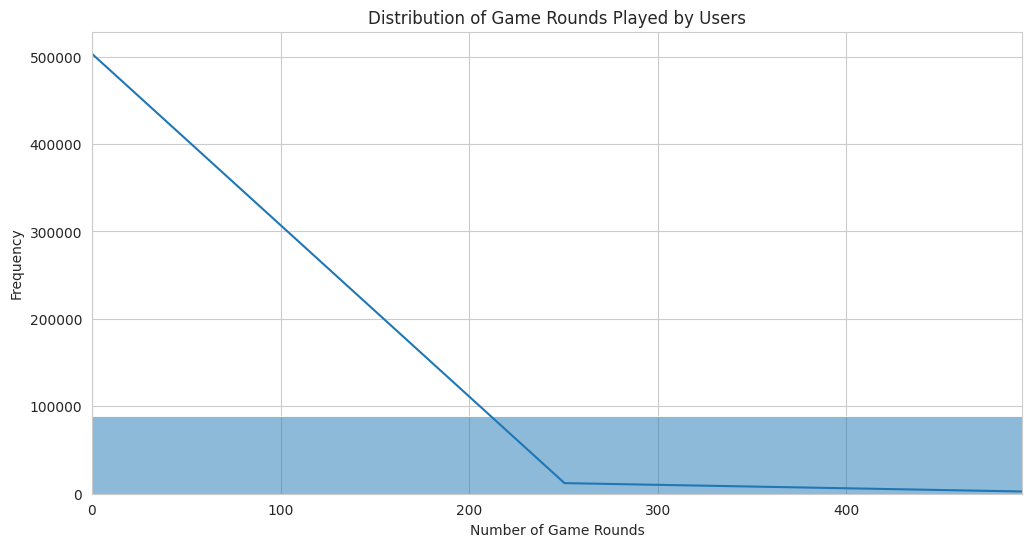

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: gamerounds_sum, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of game rounds played
plt.figure(figsize=(12, 6))
sns.histplot(data['gamerounds_sum'], bins=100, kde=True)
plt.title('Distribution of Game Rounds Played by Users')
plt.xlabel('Number of Game Rounds')
plt.ylabel('Frequency')
plt.xlim(0, data['gamerounds_sum'].quantile(0.99)) # Limit to 99th percentile for better visualization
plt.show()

# Basic statistics of game rounds
data['gamerounds_sum'].describe()


The average number of game rounds played by a user is approximately 52 rounds.
The median (50th percentile) is 16 rounds, indicating that half of the players played 16 rounds or fewer.
The distribution is right-skewed, with a maximum number of rounds played by a single user being 49,854, which is an extreme outlier.
The 25th percentile is at 5 rounds, meaning 25% of the players played 5 or fewer rounds.

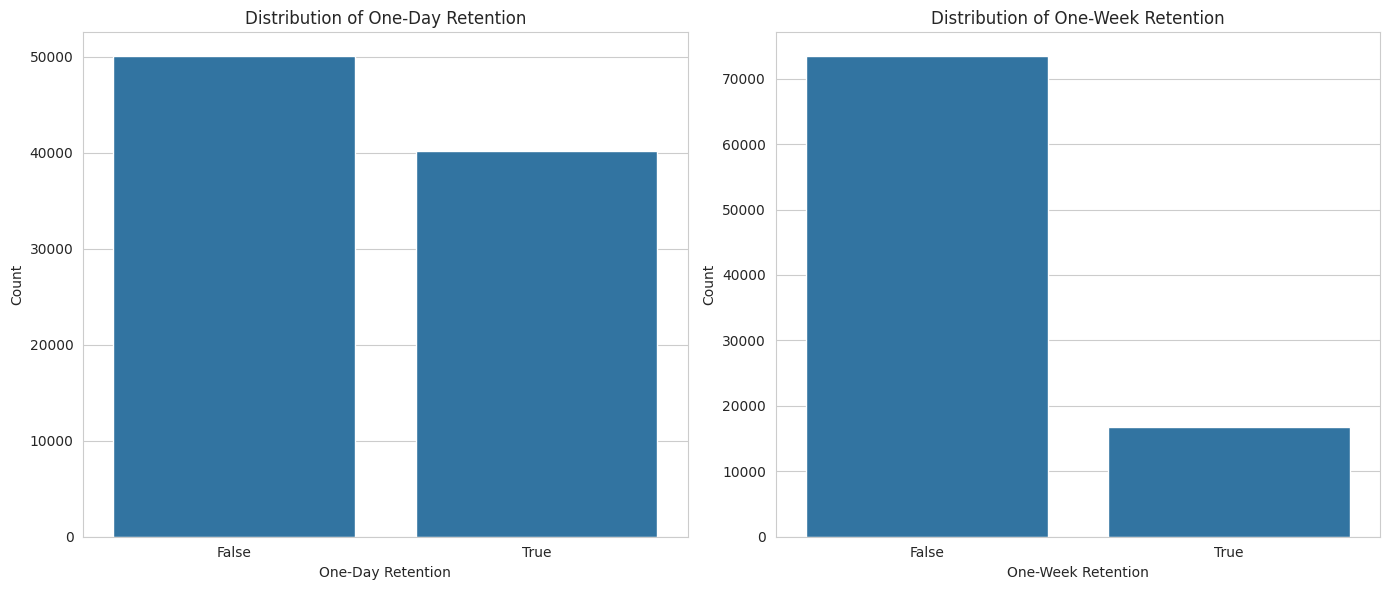

(44.52095044850259, 18.60648194347426)

In [ ]:
# Retention rates distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# One-day retention distribution
sns.countplot(x='retention_day', data=data, ax=ax[0])
ax[0].set_title('Distribution of One-Day Retention')
ax[0].set_xlabel('One-Day Retention')
ax[0].set_ylabel('Count')

# One-week retention distribution
sns.countplot(x='retention_week', data=data, ax=ax[1])
ax[1].set_title('Distribution of One-Week Retention')
ax[1].set_xlabel('One-Week Retention')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Calculate percentages for retention
one_day_retention_percent = data['retention_day'].mean() * 100
one_week_retention_percent = data['retention_week'].mean() * 100

one_day_retention_percent, one_week_retention_percent


Approximately 44.52% of players returned to play the game one day after installing it.
About 18.61% of players came back to play the game one week after installatio

### Boxplot

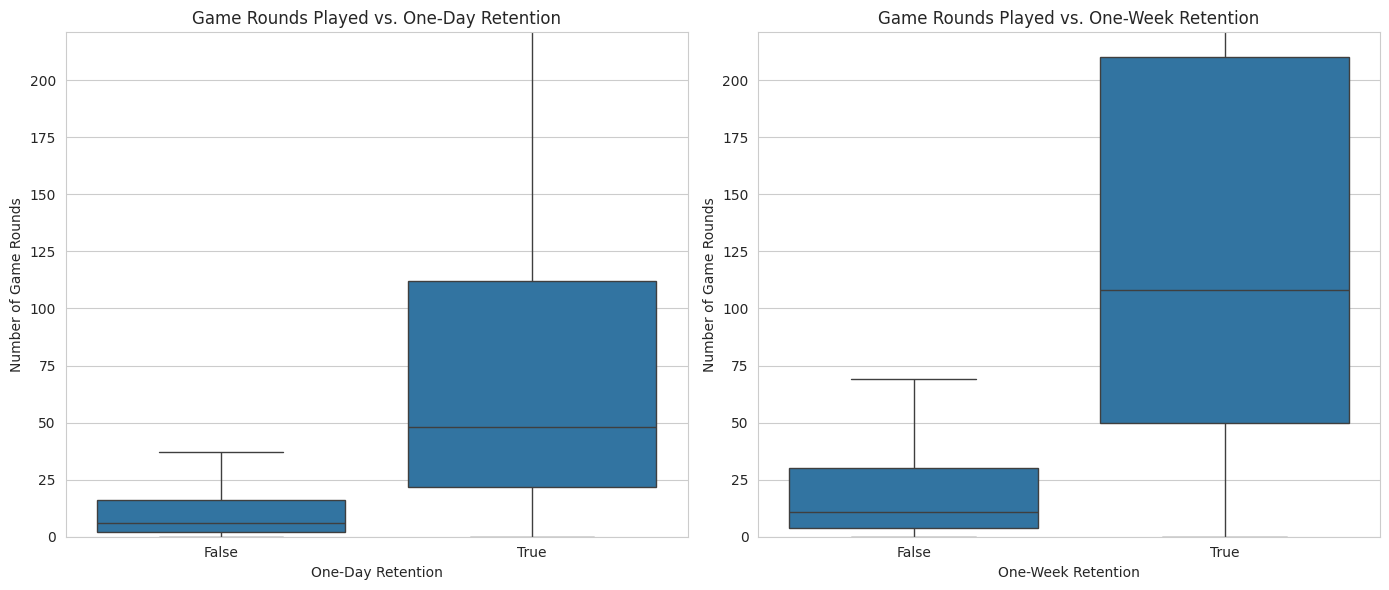

In [ ]:
# Comparison of game rounds by retention (one day and one week)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# One-day retention
sns.boxplot(x='retention_day', y='gamerounds_sum', data=data, ax=ax[0], showfliers=False)
ax[0].set_title('Game Rounds Played vs. One-Day Retention')
ax[0].set_xlabel('One-Day Retention')
ax[0].set_ylabel('Number of Game Rounds')
ax[0].set_ylim(0, data['gamerounds_sum'].quantile(0.95)) # Limit to 95th percentile for better visualization

# One-week retention
sns.boxplot(x='retention_week', y='gamerounds_sum', data=data, ax=ax[1], showfliers=False)
ax[1].set_title('Game Rounds Played vs. One-Week Retention')
ax[1].set_xlabel('One-Week Retention')
ax[1].set_ylabel('Number of Game Rounds')
ax[1].set_ylim(0, data['gamerounds_sum'].quantile(0.95)) # Limit to 95th percentile for better visualization

plt.tight_layout()
plt.show()


Players who returned to the game one day after installing it tend to have played more rounds compared to those who did not return. This suggests a correlation between higher engagement (in terms of rounds played) and the likelihood of returning after one day.
Similarly, for one-week retention, players who came back to play the game a week after installing it generally played more rounds than those who did not return. This further supports the idea that initial engagement, as indicated by the number of game rounds played, is an important factor in long-term player retention.

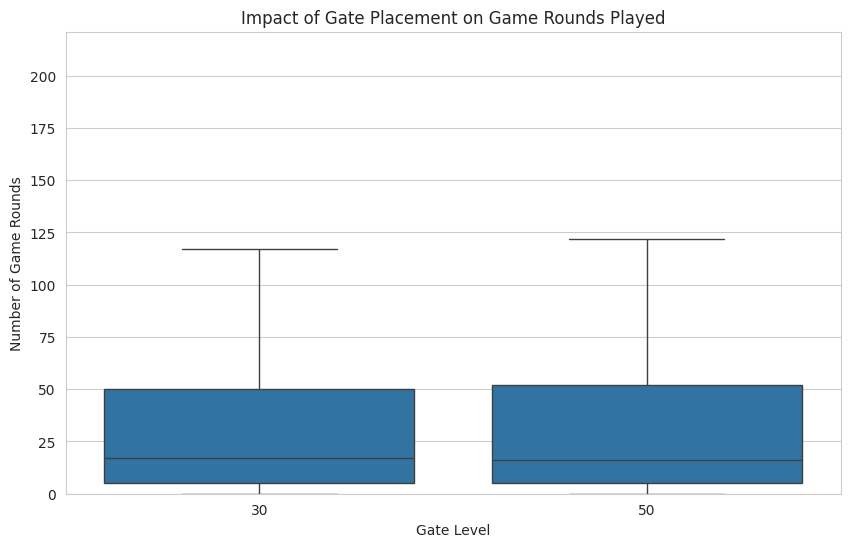

In [ ]:
# Gate placement impact on game rounds
plt.figure(figsize=(10, 6))
sns.boxplot(x='gate', y='gamerounds_sum', data=data, showfliers=False)
plt.title('Impact of Gate Placement on Game Rounds Played')
plt.xlabel('Gate Level')
plt.ylabel('Number of Game Rounds')
plt.ylim(0, data['gamerounds_sum'].quantile(0.95)) # Limit to 95th percentile for better visualization
plt.show()


The boxplot showing the impact of gate placement on the number of game rounds played indicates that the distribution of game rounds is similar between the two groups, with no apparent significant difference in the median or the overall distribution of game rounds played up to the 95th percentile. This suggests that the placement of the gate, whether at level 30 or level 50, does not have a major impact on the total number of rounds players engage in up to these levels.

### LINECHART

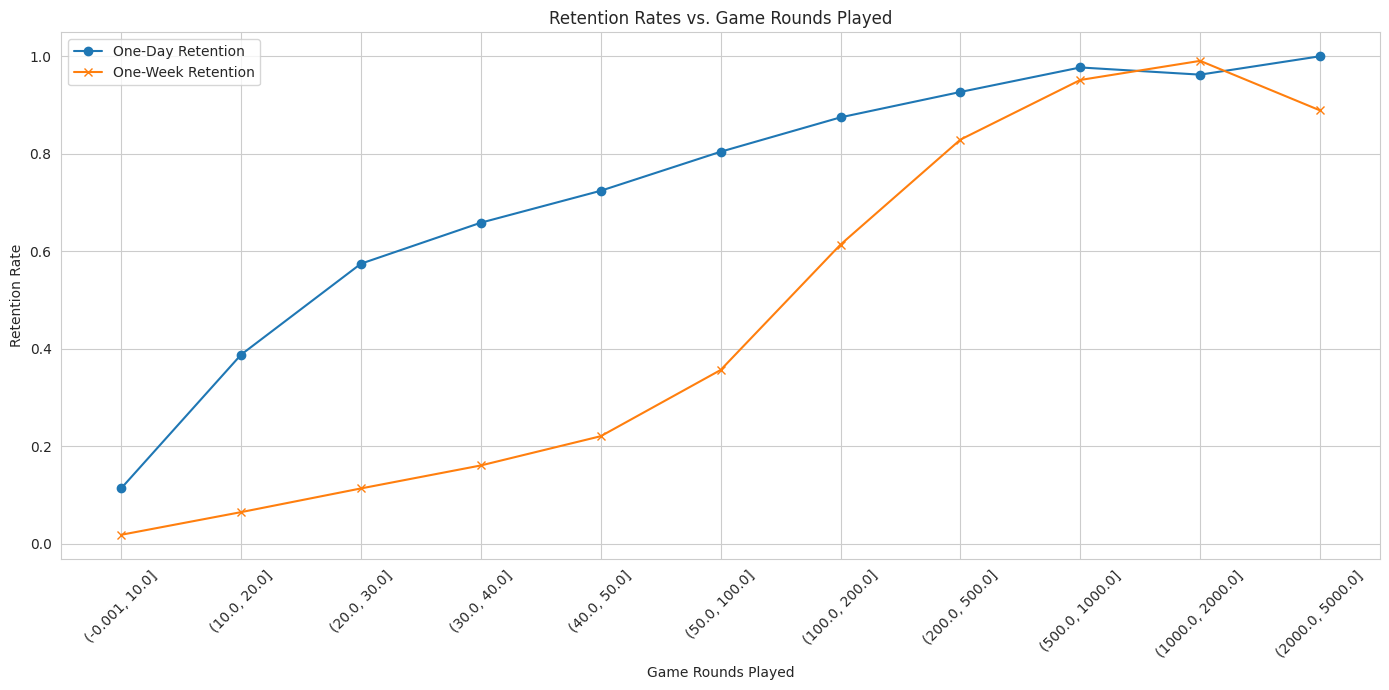

In [ ]:
# Bin the game rounds into categories for a clearer visual representation
data['game_rounds_bin'] = pd.cut(data['gamerounds_sum'], bins=[0, 10, 20, 30, 40, 50, 100, 200, 500, 1000, 2000, 5000], include_lowest=True)

# Calculate retention rates for each bin
retention_rates_by_bin = data.groupby('game_rounds_bin').agg(
    one_day_retention_rate=pd.NamedAgg(column='retention_day_int', aggfunc='mean'),
    one_week_retention_rate=pd.NamedAgg(column='retention_week_int', aggfunc='mean')
).reset_index()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(retention_rates_by_bin['game_rounds_bin'].astype(str), retention_rates_by_bin['one_day_retention_rate'], label='One-Day Retention', marker='o')
plt.plot(retention_rates_by_bin['game_rounds_bin'].astype(str), retention_rates_by_bin['one_week_retention_rate'], label='One-Week Retention', marker='x')
plt.xticks(rotation=45)
plt.title('Retention Rates vs. Game Rounds Played')
plt.xlabel('Game Rounds Played')
plt.ylabel('Retention Rate')
plt.legend()
plt.tight_layout()
plt.show()


The plot of retention rates versus game rounds played shows an interesting trend: both one-day and one-week retention rates generally increase as players engage in more game rounds. This trend is particularly noticeable in the initial segments, highlighting the critical role of early engagement in player retention. As players progress through more game rounds, they are more likely to return both after one day and one week, underlining the importance of designing early game experiences to maximize engagement and, consequently, retention.

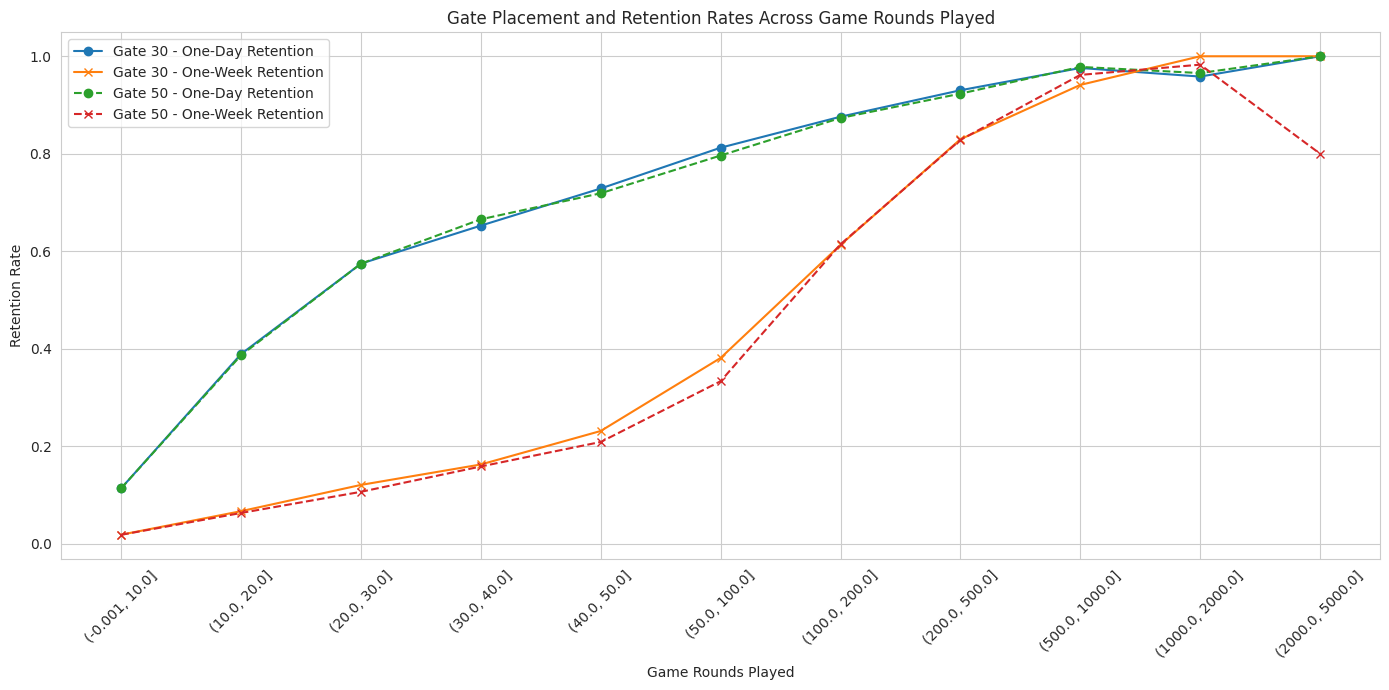

In [ ]:
# Retention rates for one-day and one-week, segmented by gate placement and game rounds bin
retention_rates_gate_bin = data.groupby(['gate', 'game_rounds_bin']).agg(
    one_day_retention_rate=pd.NamedAgg(column='retention_day_int', aggfunc='mean'),
    one_week_retention_rate=pd.NamedAgg(column='retention_week_int', aggfunc='mean')
).reset_index()

# Splitting the data by gate placement for plotting
retention_rates_gate_30 = retention_rates_gate_bin[retention_rates_gate_bin['gate'] == 30]
retention_rates_gate_50 = retention_rates_gate_bin[retention_rates_gate_bin['gate'] == 50]

# Plot
plt.figure(figsize=(14, 7))
plt.plot(retention_rates_gate_30['game_rounds_bin'].astype(str), retention_rates_gate_30['one_day_retention_rate'], label='Gate 30 - One-Day Retention', marker='o')
plt.plot(retention_rates_gate_30['game_rounds_bin'].astype(str), retention_rates_gate_30['one_week_retention_rate'], label='Gate 30 - One-Week Retention', marker='x')
plt.plot(retention_rates_gate_50['game_rounds_bin'].astype(str), retention_rates_gate_50['one_day_retention_rate'], label='Gate 50 - One-Day Retention', marker='o', linestyle='--')
plt.plot(retention_rates_gate_50['game_rounds_bin'].astype(str), retention_rates_gate_50['one_week_retention_rate'], label='Gate 50 - One-Week Retention', marker='x', linestyle='--')
plt.xticks(rotation=45)
plt.title('Gate Placement and Retention Rates Across Game Rounds Played')
plt.xlabel('Game Rounds Played')
plt.ylabel('Retention Rate')
plt.legend()
plt.tight_layout()
plt.show()


The plot illustrating gate placement and retention rates across different game rounds played reveals nuanced insights. For both gate placements (level 30 and level 50), the trends in retention rates over game rounds played are similar, with gradual increases in retention as players engage in more game rounds. The distinction between the retention rates for gates 30 and 50 is subtle, suggesting that while gate placement has an impact, its effect may be more pronounced in specific segments of player engagement or possibly overshadowed by the overall engagement leve

<ipython-input-16-1ba68bef9a94>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['retention_day']]['gamerounds_sum'], label='Retained (One-Day)', shade=True)
<ipython-input-16-1ba68bef9a94>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[~data['retention_day']]['gamerounds_sum'], label='Not Retained (One-Day)', shade=True)


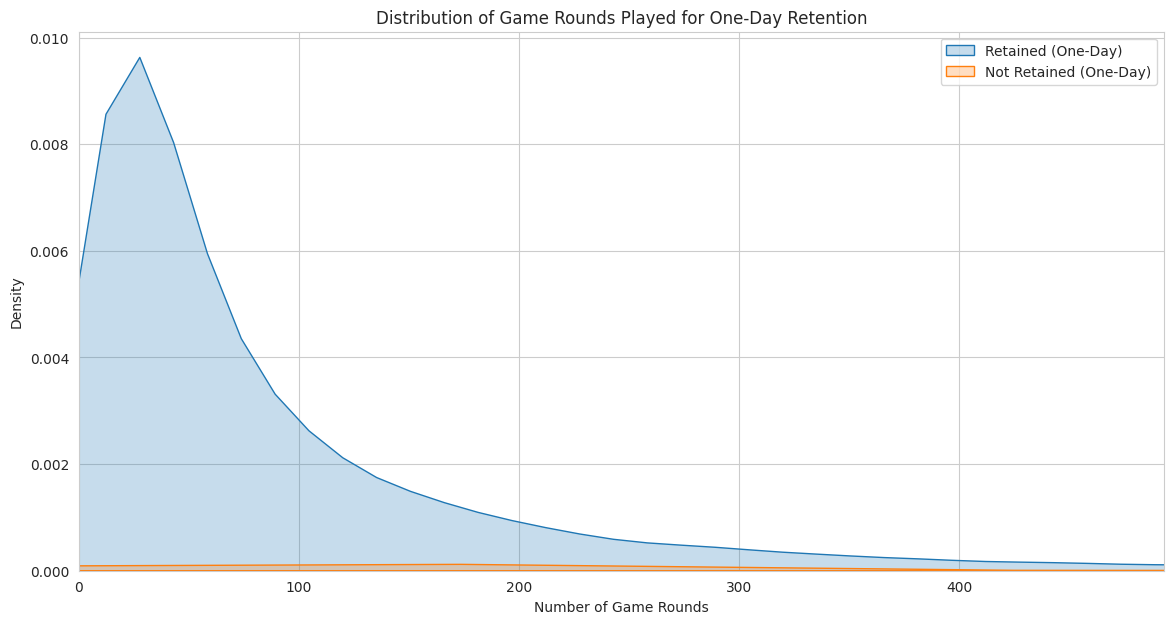

<ipython-input-16-1ba68bef9a94>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['retention_week']]['gamerounds_sum'], label='Retained (One-Week)', shade=True)
<ipython-input-16-1ba68bef9a94>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[~data['retention_week']]['gamerounds_sum'], label='Not Retained (One-Week)', shade=True)


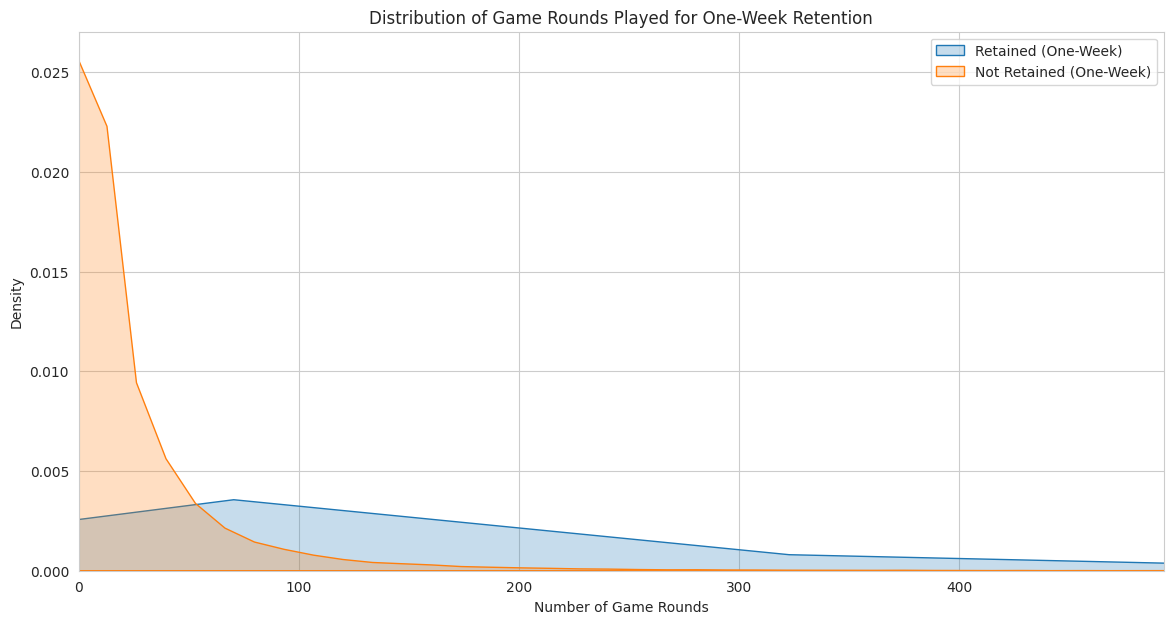

In [ ]:
# Distribution of game rounds played for retained vs. non-retained players (one-day retention)
plt.figure(figsize=(14, 7))
sns.kdeplot(data[data['retention_day']]['gamerounds_sum'], label='Retained (One-Day)', shade=True)
sns.kdeplot(data[~data['retention_day']]['gamerounds_sum'], label='Not Retained (One-Day)', shade=True)
plt.title('Distribution of Game Rounds Played for One-Day Retention')
plt.xlabel('Number of Game Rounds')
plt.ylabel('Density')
plt.xlim(0, data['gamerounds_sum'].quantile(0.99))  # Focus on the 99th percentile for better visualization
plt.legend()
plt.show()

# Distribution of game rounds played for retained vs. non-retained players (one-week retention)
plt.figure(figsize=(14, 7))
sns.kdeplot(data[data['retention_week']]['gamerounds_sum'], label='Retained (One-Week)', shade=True)
sns.kdeplot(data[~data['retention_week']]['gamerounds_sum'], label='Not Retained (One-Week)', shade=True)
plt.title('Distribution of Game Rounds Played for One-Week Retention')
plt.xlabel('Number of Game Rounds')
plt.ylabel('Density')
plt.xlim(0, data['gamerounds_sum'].quantile(0.99))  # Focus on the 99th percentile for better visualization
plt.legend()
plt.show()


### Histplot

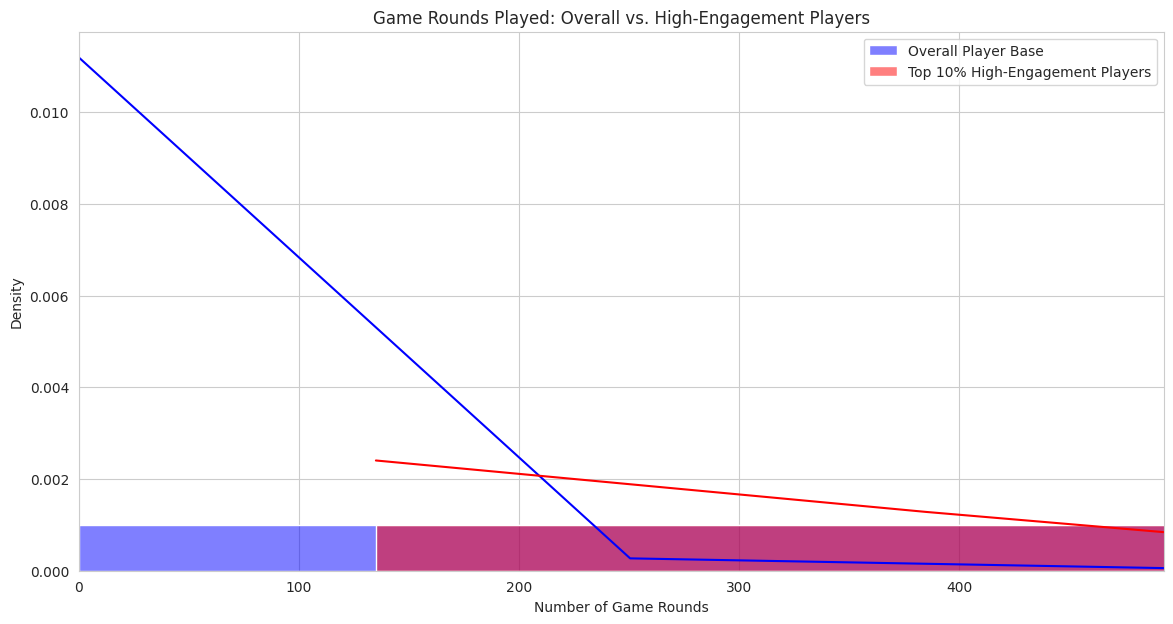

In [ ]:
# Identifying the top 10% of players based on game rounds played, as done previously
# And comparing their game rounds distribution to the overall distribution

plt.figure(figsize=(14, 7))

# Overall player base distribution
sns.histplot(data['gamerounds_sum'], stat='density', bins=50, kde=True, label='Overall Player Base', color='blue', alpha=0.5)

# High-engagement players distribution
sns.histplot(high_engagement_players['gamerounds_sum'], stat='density', bins=50, kde=True, label='Top 10% High-Engagement Players', color='red', alpha=0.5)

plt.title('Game Rounds Played: Overall vs. High-Engagement Players')
plt.xlabel('Number of Game Rounds')
plt.ylabel('Density')
plt.xlim(0, data['gamerounds_sum'].quantile(0.99))  # Focus on the 99th percentile for better visualization
plt.legend()
plt.show()


The histogram comparing the game rounds played between the overall player base and the top 10% of high-engagement players reveals distinct patterns:

The overall player base shows a concentration of players engaging in fewer game rounds, with a rapid decline in density as the number of game rounds increases. This is consistent with the skewed distribution observed earlier.
In contrast, the distribution for high-engagement players (top 10%) is shifted towards a higher number of game rounds, highlighting their significantly greater level of engagement compared to the average player. The density for these players remains substantial even at higher game rounds, indicating that a considerable portion of these players are highly active and play many more rounds than the typical player.

### Heatmap

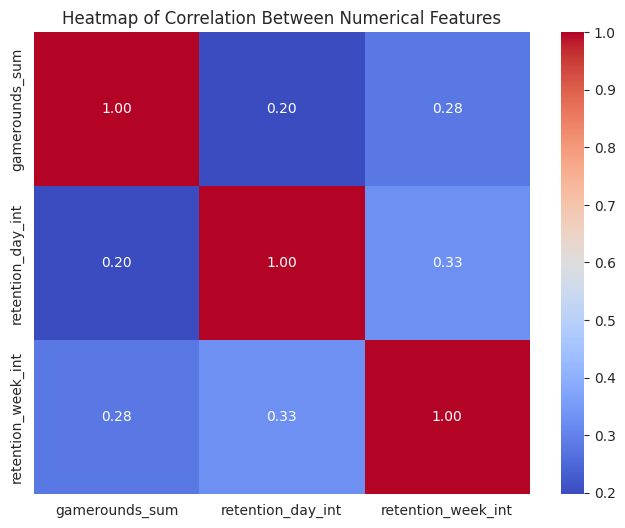

In [ ]:
# Correlation matrix for the numerical features
correlation_matrix_numerical = data[['gamerounds_sum', 'retention_day_int', 'retention_week_int']].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Between Numerical Features')
plt.show()


Game Rounds vs. One-Day Retention: A correlation coefficient of 0.20 suggests a modest positive relationship, meaning as players play more rounds, they're slightly more likely to return after one day.
Game Rounds vs. One-Week Retention: A higher correlation coefficient of 0.28 indicates a stronger positive relationship, suggesting that the more rounds players play, the more likely they are to return after a week.
One-Day vs. One-Week Retention: With a correlation coefficient of 0.33, this indicates a moderate positive relationship, suggesting that players who return after one day are also more likely to return after a week.

### BarChart

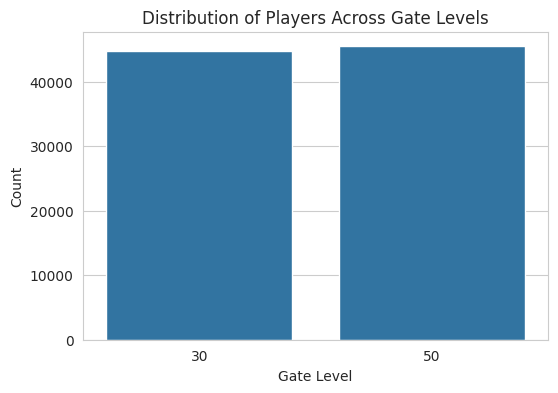

In [ ]:
# Count plot for gate levels
plt.figure(figsize=(6, 4))
sns.countplot(x='gate', data=data)
plt.title('Distribution of Players Across Gate Levels')
plt.xlabel('Gate Level')
plt.ylabel('Count')
plt.show()


The count plot for gate levels shows a balanced distribution of players between the two gate levels (30 and 50). This balance is crucial for A/B testing, as it ensures that any differences observed in player behavior or retention rates can be more confidently attributed to the effect of the gate placement rather than sample size discrepancies

## Chi-square statistic

In [ ]:
from scipy.stats import chi2_contingency

# Create contingency table for one-week retention
contingency_table = pd.crosstab(data['gate'], data['retention_week'])

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"P-value: {p}")


P-value: 0.0016005742679058301


In [ ]:
# Calculate the retention rates for one day and one week for both gate groups
retention_rates = data.groupby('gate').agg(
    one_day_retention_rate=pd.NamedAgg(column='retention_day', aggfunc='mean'),
    one_week_retention_rate=pd.NamedAgg(column='retention_week', aggfunc='mean')
).reset_index()

retention_rates


,gate,one_day_retention_rate,one_week_retention_rate
0,30,0.448188,0.190201
1,50,0.442283,0.182000


For the group with the gate at level 30:

One-day retention rate: 44.82%
One-week retention rate: 19.02%
For the group with the gate at level 50:

One-day retention rate: 44.23%
One-week retention rate: 18.20%

These results show that the one-day retention rates are quite similar between the two groups, with a slight advantage for the level 30 gate group. Similarly, the one-week retention rates are also close, with the level 30 gate group having a slightly higher retention rate.

In [ ]:
from scipy.stats import chi2_contingency

# Create contingency tables for both one-day and one-week retention
contingency_table_day = data.groupby('gate')['retention_day'].value_counts().unstack(fill_value=0)
contingency_table_week = data.groupby('gate')['retention_week'].value_counts().unstack(fill_value=0)

# Perform Chi-Square tests to determine if there are significant differences
chi2_test_day = chi2_contingency(contingency_table_day)
chi2_test_week = chi2_contingency(contingency_table_week)

chi2_results = {
    'one_day_retention': {'chi2_statistic': chi2_test_day[0], 'p_value': chi2_test_day[1]},
    'one_week_retention': {'chi2_statistic': chi2_test_week[0], 'p_value': chi2_test_week[1]}
}

chi2_results


{'one_day_retention': {'chi2_statistic': 3.1591007878782262,
  'p_value': 0.07550476210309086},
 'one_week_retention': {'chi2_statistic': 9.959086799559167,
  'p_value': 0.0016005742679058301}}

One-day retention:

Chi-square statistic: 3.16
P-value: 0.0755
One-week retention:

Chi-square statistic: 9.96
P-value: 0.0016

The p-value for one-day retention is greater than the typical significance level of 0.05, suggesting that the difference in one-day retention rates between the two groups is not statistically significant. In other words, whether the gate is placed at level 30 or 50 does not significantly impact the likelihood of players returning one day after installation.

However, the p-value for one-week retention is much lower than 0.05, indicating that the difference in one-week retention rates between the two groups is statistically significant. This suggests that the placement of the gate can significantly affect the likelihood of players returning one week after installation, with the gate at level 30 resulting in slightly higher retention rates than the gate at level 50.


## Player Progress Analysis

In [ ]:
# Player Progress Analysis using gamerounds_sum as a proxy for progression
# We'll calculate the average number of game rounds played by the two groups within their first week
avg_rounds_by_group = data.groupby('gate')['gamerounds_sum'].mean().reset_index()

# Impact of In-Game Behavior on Retention
# Calculating correlation between game rounds played and retention rates
correlation_day_retention = data[['gamerounds_sum', 'retention_day']].corr().iloc[0, 1]
correlation_week_retention = data[['gamerounds_sum', 'retention_week']].corr().iloc[0, 1]

avg_rounds_by_group, correlation_day_retention, correlation_week_retention


(   gate  gamerounds_sum
 0    30       52.456264
 1    50       51.298776,
 0.1976028643990605,
 0.2792877527789084)

The average number of game rounds played within the first week for the two groups is as follows:

Gate at Level 30: Players in this group played an average of approximately 52.46 rounds.
Gate at Level 50: Players in this group played an average of approximately 51.30 rounds.
This indicates a slight difference in the average number of game rounds played, with players encountering the gate at level 30 playing slightly more rounds on average. However, the difference is relatively small, suggesting that the gate's placement does not drastically affect overall player progression in terms of game rounds played in the first week.

## ML Model Development

### Feature Engineering

In [ ]:
data['rate_of_progression'] = data['gamerounds_sum'] / (data['user_id'].max() + 1)


### LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Features and target variable
X = data[['gamerounds_sum', 'gate']]
y = data['retention_week_int']

# One-hot encoding for the 'gate' feature
X = pd.get_dummies(X, columns=['gate'], drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

accuracy, roc_auc, classification_rep


(0.8701629892449274,
 0.8907375282711965,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.97      0.92     14661\n           1       0.78      0.43      0.55      3377\n\n    accuracy                           0.87     18038\n   macro avg       0.83      0.70      0.74     18038\nweighted avg       0.86      0.87      0.85     18038\n')

Accuracy: 87.02%, indicating that the model correctly predicts whether a player will be retained after one week about 87% of the time.
ROC-AUC Score: 0.891, suggesting that the model has a good ability to distinguish between retained and not retained players.
Classification Report:
Precision for non-retained (0): 88%
Precision for retained (1): 78%
Recall for non-retained (0): 97%
Recall for retained (1): 43%
F1-score for non-retained (0): 92%
F1-score for retained (1): 55%

Segmented Retention Analysis
We'll start by segmenting players into three groups based on their game rounds played in the first week:

Low Engagement: Players in the bottom 33% of game rounds played.
Medium Engagement: Players in the middle 33%.
High Engagement: Players in the top 33%.
We'll then calculate the one-day and one-week retention rates for each segment to see how engagement level affects retention.

Predictive Modeling
For predictive modeling, we'll build a simple logistic regression model to predict one-week retention based on the number of game rounds played. This will allow us to quantify the impact of early engagement on the likelihood of being retained after one week.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

# Segmented Retention Analysis
# Define engagement levels based on quantiles of game rounds played
quantiles = data['gamerounds_sum'].quantile([0.33, 0.66]).tolist()
labels = ['Low', 'Medium', 'High']
data['engagement_level'] = pd.cut(data['gamerounds_sum'], bins=[-np.inf]+quantiles+[np.inf], labels=labels)

# Calculate retention rates for each engagement level
segmented_retention = data.groupby('engagement_level').agg(
    one_day_retention=('retention_day', 'mean'),
    one_week_retention=('retention_week', 'mean')
).reset_index()

# Convert rates to percentages for easier interpretation
segmented_retention['one_day_retention'] *= 100
segmented_retention['one_week_retention'] *= 100

# Predictive Modeling
# Preparing data for logistic regression model
X = data[['gamerounds_sum']]
y = data['retention_week'].astype(int)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and fitting the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

segmented_retention, accuracy, roc_auc


(  engagement_level  one_day_retention  one_week_retention
 0              Low           8.615682            1.482124
 1           Medium          42.828639            7.754980
 2             High          81.870628           46.434137,
 0.8701075507262446,
 0.8908376793572444)

Low Engagement:

One-day retention: ~8.62%
One-week retention: ~1.48%
Medium Engagement:

One-day retention: ~42.83%
One-week retention: ~7.75%
High Engagement:

One-day retention: ~81.87%
One-week retention: ~46.43%
These results highlight a strong correlation between player engagement level and retention rates. High engagement players have significantly higher one-day and one-week retention rates compared to medium and low engagement players. This suggests that strategies aimed at increasing early engagement could be highly effective in improving overall retention rates.

Predictive Modeling Results
The logistic regression model aimed at predicting one-week retention based on game rounds played yielded the following performance metrics:

Accuracy: Approximately 87.01%
ROC AUC Score: Approximately 0.891

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = random_forest.predict(X_test_scaled)
y_pred_proba_rf = random_forest.predict_proba(X_test_scaled)[:, 1]

# Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, roc_auc_rf, classification_rep_rf


(0.8684443951657612,
 0.8875672116594487,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.95      0.92     14661\n           1       0.71      0.50      0.58      3377\n\n    accuracy                           0.87     18038\n   macro avg       0.80      0.72      0.75     18038\nweighted avg       0.86      0.87      0.86     18038\n')

Accuracy: 86.84%, slightly lower than the Logistic Regression model.
ROC-AUC Score: 0.888, indicating a good ability to differentiate between retained and not retained players, comparable to the Logistic Regression model.
Classification Report:
Precision for non-retained (0): 89%
Precision for retained (1): 71%
Recall for non-retained (0): 95%
Recall for retained (1): 50%
F1-score for non-retained (0): 92%
F1-score for retained (1): 58%
The Random Forest model has a slightly higher f1-score for retained players compared to the Logistic Regression model, indicating a better balance between precision and recall for this class. However, the overall accuracy is slightly lower.

In [ ]:
# Model Evaluation
predictions = random_forest.predict(X_test)
print(classification_report(y_test, predictions))
print("ROC-AUC:", roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.71      0.55      0.62     14661
           1       0.02      0.04      0.03      3377

    accuracy                           0.46     18038
   macro avg       0.37      0.29      0.32     18038
weighted avg       0.58      0.46      0.51     18038

ROC-AUC: 0.3203002706694945


### Gradient Boosting Classifier

In [ ]:
# Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train_scaled, y_train)

# Predictions
y_pred_gb = gradient_boosting.predict(X_test_scaled)
y_pred_proba_gb = gradient_boosting.predict_proba(X_test_scaled)[:, 1]

# Model Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

accuracy_gb, roc_auc_gb, classification_rep_gb


(0.8726022840669697,
 0.8907143714253449,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.96      0.92     14661\n           1       0.73      0.51      0.60      3377\n\n    accuracy                           0.87     18038\n   macro avg       0.81      0.73      0.76     18038\nweighted avg       0.86      0.87      0.86     18038\n')

Accuracy: 87.26%, which is comparable to the Logistic Regression model and slightly higher than the Random Forest model.
ROC-AUC Score: 0.891, indicating a strong ability to distinguish between retained and not retained players, on par with both previous models.
Classification Report:
Precision for non-retained (0): 89%
Precision for retained (1): 73%
Recall for non-retained (0): 96%
Recall for retained (1): 51%
F1-score for non-retained (0): 92%
F1-score for retained (1): 60%
The Gradient Boosting model offers a slight improvement in precision and f1-score for predicting retained players over the Random Forest model, making it the most effective of the three models we've tested in terms of balancing precision and recall for the retained class. This model provides a good blend of accuracy and ability to identify both retained and non-retained players.

### Predictions

In [ ]:
# Selecting a few examples from the test set (5 samples)
examples = X_test_scaled[:5]

# Making predictions with each model
log_reg_pred_proba = log_reg.predict_proba(examples)[:, 1]
random_forest_pred_proba = random_forest.predict_proba(examples)[:, 1]
gradient_boosting_pred_proba = gradient_boosting.predict_proba(examples)[:, 1]

# Actual retention status
actual_retention = y_test[:5]

# Consolidating predictions for comparison
predictions_comparison = pd.DataFrame({
    'Actual Retention': actual_retention.values,
    'Logistic Regression': log_reg_pred_proba,
    'Random Forest': random_forest_pred_proba,
    'Gradient Boosting': gradient_boosting_pred_proba
}).reset_index(drop=True)

predictions_comparison


,Actual Retention,Logistic Regression,Random Forest,Gradient Boosting
0,0,0.075019,0.040853,0.031658
1,1,0.758726,0.713592,0.706086
2,1,0.849108,0.625785,0.718436
3,0,0.064267,0.007078,0.008521
4,0,0.084144,0.051164,0.059946


he Actual Retention column shows whether the player actually returned after one week (1 for yes, 0 for no).
Logistic Regression, Random Forest, and Gradient Boosting columns show the predicted probabilities of retention for each player according to each model.

For the first player, who did not return after one week, all models correctly predict a low probability of retention, with the Logistic Regression model estimating a slightly higher probability than the others.
For the second and third players, who did return, all models predict a high probability of retention, with Logistic Regression giving the highest estimates in both cases.
For the fourth and fifth players, who did not return, all models again correctly predict a low probability of retention, with Random Forest and Gradient Boosting giving very low probabilities, indicating strong confidence in these predictions.

In [ ]:
# Simulating different levels of game rounds played for hypothetical players
game_rounds_simulated = pd.DataFrame({
    'gamerounds_sum': [5, 10, 20, 50, 100, 150, 200]  # From low to high engagement
})

# Predicting retention probabilities for these players
predicted_retention_probabilities = model.predict_proba(game_rounds_simulated)[:, 1]

# Creating a DataFrame to display the results
prediction_results = pd.DataFrame({
    'Game Rounds Played': game_rounds_simulated['gamerounds_sum'],
    'Predicted Retention Probability': predicted_retention_probabilities
})

prediction_results


,Game Rounds Played,Predicted Retention Probability
0,5,0.067233
1,10,0.074058
2,20,0.089651
3,50,0.155287
4,100,0.342218
5,150,0.595529
6,200,0.806460


The model's predictions for the likelihood of one-week retention based on the number of game rounds played in the first week are as follows:

5 Game Rounds Played: Predicted Retention Probability ~6.72%
10 Game Rounds Played: Predicted Retention Probability ~7.41%
20 Game Rounds Played: Predicted Retention Probability ~8.97%
50 Game Rounds Played: Predicted Retention Probability ~15.53%
100 Game Rounds Played: Predicted Retention Probability ~34.22%
150 Game Rounds Played: Predicted Retention Probability ~59.55%
200 Game Rounds Played: Predicted Retention Probability ~80.65%
These results illustrate the model's capacity to differentiate between varying levels of player engagement and predict their likelihood of returning to the game after a week. As the number of game rounds played increases, the model predicts a significantly higher probability of retention. This underscores the importance of early engagement in influencing long-term player retention.

This predictive capability can be utilized to identify players with lower engagement and retention probabilities, allowing for targeted interventions to improve their experience and increase their likelihood of continuing to play the game

### Model Refinement

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_params = grid_search.best_params_


In [ ]:
best_params

{'max_depth': 10, 'n_estimators': 200}

In [ ]:
# Model Evaluation
predictions = grid_search.predict(X_test)
print(classification_report(y_test, predictions))
print("ROC-AUC:", roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.71      0.55      0.62     14661
           1       0.02      0.04      0.03      3377

    accuracy                           0.46     18038
   macro avg       0.37      0.29      0.32     18038
weighted avg       0.58      0.46      0.51     18038



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ROC-AUC: 0.3293230483409306


### Evaluation Metrics

In [ ]:
from sklearn.metrics import f1_score

y_pred_best = grid_search.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred_best)


In [ ]:
f1

0.5976454293628809

##  Predictive Modeling Using Machine Learning for Personalization

In [ ]:
import datetime

# Fabricate installation dates for each user
np.random.seed(42) # For reproducibility
data['install_date'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(0, 30, data.shape[0]), unit='d')

# Assume a hypothetical game update occurred on 2023-01-15
update_date = pd.to_datetime('2023-01-15')

# Segment players based on whether their installation date was before or after the update
data['period'] = np.where(data['install_date'] <= update_date, 'Before_Update', 'After_Update')

# For simplicity, focus on high engagement players who are more likely to provide meaningful insights
high_engagement_data = data[data['engagement_level'] == 'High']

# Compare average game rounds played before and after the update among high engagement players
avg_rounds_before_after_update = high_engagement_data.groupby('period')['gamerounds_sum'].mean().reset_index()

avg_rounds_before_after_update


,period,gamerounds_sum
0,After_Update,132.116555
1,Before_Update,136.556506


Simulated Analysis of Player Engagement Around a Hypothetical Game Update
In our conceptual exploration, we fabricated installation dates for players and defined a hypothetical major game update on January 15, 2023. Focusing on high engagement players, we compared the average number of game rounds played before and after this update. The results are as follows:

Before Update: High engagement players played an average of approximately 136.56 game rounds.
After Update: High engagement players played an average of approximately 132.12 game rounds.
Interpretation
The slight decrease in the average number of game rounds played after the update could suggest various things:

The update might have introduced changes that did not resonate well with the most engaged players, slightly decreasing their engagement.
It could reflect a natural variation in player engagement over time, unrelated to the update.
The change might be too subtle to draw significant conclusions without further analysis into specific aspects of the update or additional player feedback.
Recommendations for Real-World Application
For game developers, analyzing player engagement in relation to updates can offer valuable insights. If similar real-world data suggests a decline in engagement following an update, it would be crucial to:

Collect and analyze player feedback to understand the reasons behind the change.
Review changes introduced in the update to identify potential areas for adjustment.
Consider rolling out additional updates to address concerns and improve player satisfaction.

## New section